# Medicinal Plant Leaf Image Analysis - Tensorflow/Keras

# Data Processing for a dataset that has training and validation sub-folders defined

We are going to use medicinal image dataset (https://www.kaggle.com/datasets/bijlyborkatullah/medicinal-plant-bijly-withbg/data) to illustrate the data processing and model preparation using this.

# All common imports

In [10]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

# Generic function to return training and validation dataset

In [2]:
# grader-required-cell

#The below function takes in the folder path of the training and validation subfolders as arguments

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  ### END CODE HERE
  return train_generator, validation_generator

In [3]:
TRAINING_DIR = "./tmp/medicinal-images-2/Train/"
VALIDATION_DIR = "./tmp/medicinal-images-2/Validation/"
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 3574 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


# Building a simple CNN/DNN layered model 

In [5]:
# grader-required-cell

# GRADED FUNCTION: create_model
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = Sequential([
      Conv2D(128, (3,3), activation='relu', input_shape=(224, 224, 3)),
      MaxPooling2D(2,2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
      #Conv2D(64, (3,3), activation='relu'),
      #MaxPooling2D(2,2),
      #Conv2D(32, (3,3), activation='relu'),
      #MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      Flatten(),
      # 512 neuron hidden layer
      Dense(512, activation='relu'),
      Dropout(0.2),
      # 256 neuron hidden layer
      Dense(256, activation='relu'),
      Dropout(0.2),
      # 10 output neurons. It will contain values from 0-9 where 0 for 1st class ('Bohera') and 9 for the last ('Zenora')
      Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  ### END CODE HERE

  return model

# Train the model

In [6]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
72/72 [==============================] - 548s 8s/step - loss: 2.3555 - accuracy: 0.2389 - val_loss: 2.4440 - val_accuracy: 0.2320
Epoch 2/20
72/72 [==============================] - 521s 7s/step - loss: 1.7829 - accuracy: 0.3926 - val_loss: 2.4315 - val_accuracy: 0.2600
Epoch 3/20
72/72 [==============================] - 512s 7s/step - loss: 1.2127 - accuracy: 0.5895 - val_loss: 2.2678 - val_accuracy: 0.3660
Epoch 4/20
72/72 [==============================] - 513s 7s/step - loss: 0.9965 - accuracy: 0.6544 - val_loss: 2.0861 - val_accuracy: 0.3820
Epoch 5/20
72/72 [==============================] - 521s 7s/step - loss: 0.8750 - accuracy: 0.7096 - val_loss: 2.1072 - val_accuracy: 0.4480
Epoch 6/20
72/72 [==============================] - 519s 7s/step - loss: 0.7815 - accuracy: 0.7361 - val_loss: 1.7920 - val_accuracy: 0.4660
Epoch 7/20
72/72 [==============================] - 515s 7s/step - loss: 0.7364 - accuracy: 0.7552 - val_loss: 2.4135 - val_accuracy: 0.4000
Epoch 8/20
72

# Plot the accuracy

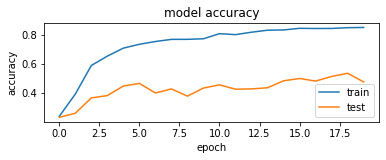

In [7]:
import matplotlib.pyplot as plot
plot.subplot(2,1,1)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='lower right')

# Plot the loss


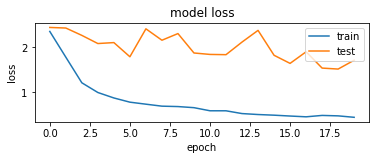

In [8]:
plot.subplot(2,1,2)
plot.plot(history.history['loss'])
plot.plot(history.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper right')

In [11]:
medicinal_leaf_labels = os.listdir("./tmp/medicinal-images-2/Train")
print(medicinal_leaf_labels)

['Bohera', 'Devilbackbone', 'Haritoki', 'Lemongrass', 'Nayontara', 'Neem', 'Pathorkuchi', 'Thankuni', 'Tulsi', 'Zenora']


# Make predictions using above model

1/1 [==============================] - 0s 68ms/step


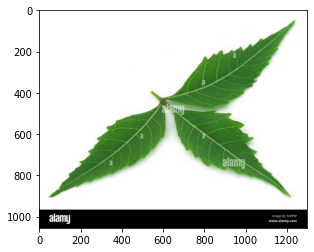

Medicinal Plant is Neem


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

fn="neem3.jpg"
image_path='./sample_dir_creation/' + fn

image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
x=img_to_array(image)
x /= 255.0
x=np.expand_dims(x, axis=0)
classes = model.predict(x)

img = mpimg.imread(image_path)
plt.imshow(img)

plt.show()

category=np.array(classes[0]).argmax()
print("Medicinal Plant is " + medicinal_leaf_labels[category])
